# Deffaunt-Weisbuch Model with Heterogeneous Activation Probability
# Pareto Distribution
## Author: Grace Li
## Created On: 12/8/2021

This python code explores the structures of the randomly generated erdos-renyi graphs

In [1]:
# import required packages

import numpy as np
import pandas as pd
from scipy import io
import scipy
import sys
import random
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
import time as time
import igraph as igraph
import os.path

In [2]:
# Import our own DW module
import sys
sys.path.append('..') #look one directory above
import DW

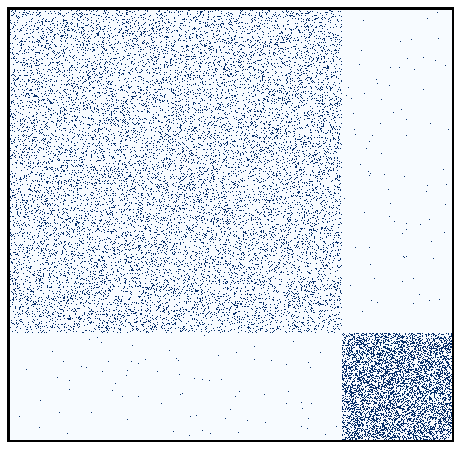

In [10]:
## 2-community structure

#Block sizes
n = 500
A = int(n * 0.75)
B = int(n * 0.25)
block_sizes = [A, B]

p = 0.1
p_aa = (n - 1) / (A - 1) * p
p_bb = (n - 1) / (B - 1) * p
p_ab = 1 / n
pref_matrix = [[p_aa, p_ab], [p_ab, p_bb]]

G = igraph.Graph.SBM(n, pref_matrix, block_sizes, directed=False, loops=False)

#Get the adjacency matrix and plot
matrix = G.get_adjacency()

fig, ax = plt.subplots(figsize = (8,8), facecolor='white')
df = pd.DataFrame(matrix)
sns.heatmap(df, xticklabels=False, yticklabels=False,
           cmap='Blues', cbar=False)

# Draw frame for heatmap
linewidth = 5
ax.axvline(x=0, color='k',linewidth=linewidth)
ax.axvline(x=matrix.shape[0], color='k',linewidth=linewidth)
ax.axhline(y=0, color='k',linewidth=linewidth)
ax.axhline(y=matrix.shape[1], color='k',linewidth=linewidth)

plt.savefig("community.png")

Text(0.5, 0, 'Degree (k)')

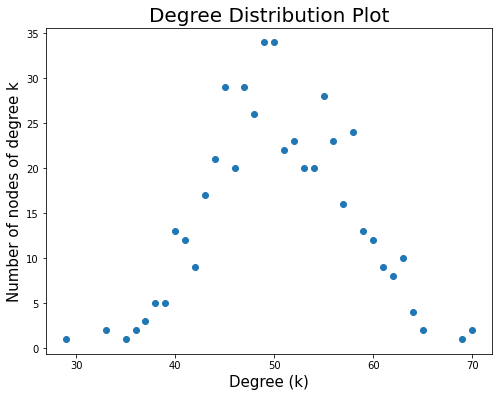

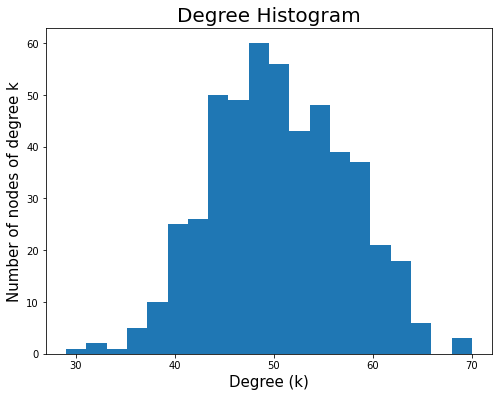

In [11]:
#Plot the degree distribution

degree_sequence = G.degree()
degree_sequence = np.array(degree_sequence) #Convert it to a numpy array so we can get the counts
degrees, counts = np.unique(degree_sequence, return_counts=True)
fraction = counts / sum(counts) #normalize the counts to get the degree distribution (the fraction of nodes of each degree)

#Regular scatter plot
fig, ax = plt.subplots(figsize = (8, 6)) #Create 6 in x 8 in figure
ax.scatter(degrees, counts) #Plot the degree distribution as a scatter plot
ax.set_title('Degree Distribution Plot', fontsize = 20)
ax.set_ylabel(r"Number of nodes of degree k", fontsize=15) #You can add LaTeX to text using $$ and the r in front of the string
ax.set_xlabel(r"Degree (k)", fontsize=15)
# plt.savefig("combined_plots/Caltech_degrees.png")

#Plot an unnormalized histogram of counts of each degree
fig, ax = plt.subplots(figsize = (8, 6)) #Create 6 in x 8 in figure
ax.hist(degree_sequence, bins = 20) #Plot the unnormalized histogram with just counts, you can try varying the number of bins to see what works for your network
ax.set_title('Degree Histogram', fontsize = 20)
ax.set_ylabel(r"Number of nodes of degree k", fontsize=15) #You can add LaTeX to text using $$ and the r in front of the string
ax.set_xlabel("Degree (k)", fontsize=15)

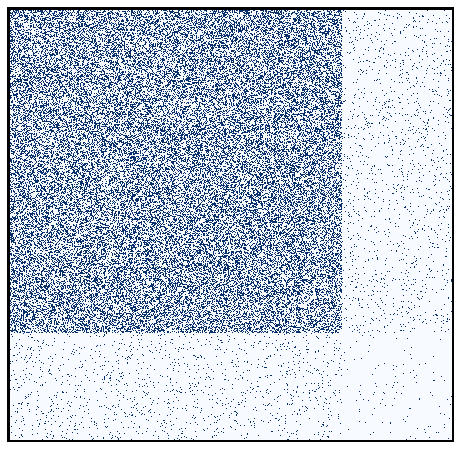

In [5]:
## Core - Periphery

#Block sizes
n = 500
A = int(n * 0.75)
B = int(n * 0.25)
block_sizes = [A, B]

p = 0.3
p_aa = (n - 1) / (A - 1) * p
p_ab = 20 / n
p_bb = 1 / (B - 1)
pref_matrix = [[p_aa, p_ab], [p_ab, p_bb]]

G = igraph.Graph.SBM(n, pref_matrix, block_sizes, directed=False, loops=False)

#Get the adjacency matrix and plot
matrix = G.get_adjacency()

fig, ax = plt.subplots(figsize = (8,8), facecolor='white')
df = pd.DataFrame(matrix)
sns.heatmap(df, xticklabels=False, yticklabels=False,
           cmap='Blues', cbar=False)

# Draw frame for heatmap
linewidth = 5
ax.axvline(x=0, color='k',linewidth=linewidth)
ax.axvline(x=matrix.shape[0], color='k',linewidth=linewidth)
ax.axhline(y=0, color='k',linewidth=linewidth)
ax.axhline(y=matrix.shape[1], color='k',linewidth=linewidth)

plt.savefig("core-periphery.png")

Text(0.5, 0, 'Degree (k)')

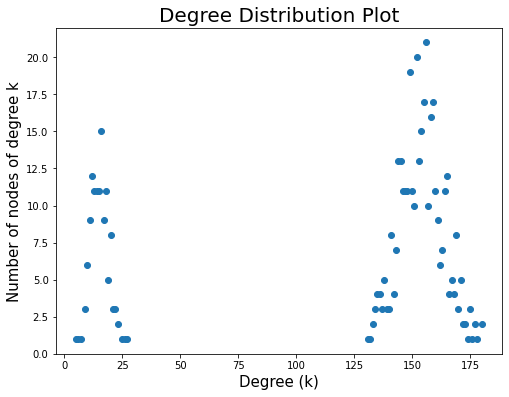

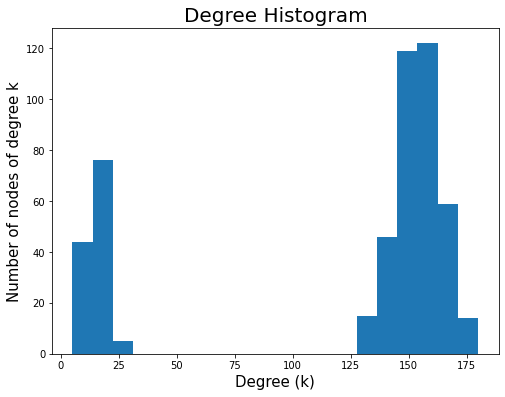

In [8]:
#Plot the degree distribution

degree_sequence = G.degree()
degree_sequence = np.array(degree_sequence) #Convert it to a numpy array so we can get the counts
degrees, counts = np.unique(degree_sequence, return_counts=True)
fraction = counts / sum(counts) #normalize the counts to get the degree distribution (the fraction of nodes of each degree)

#Regular scatter plot
fig, ax = plt.subplots(figsize = (8, 6)) #Create 6 in x 8 in figure
ax.scatter(degrees, counts) #Plot the degree distribution as a scatter plot
ax.set_title('Degree Distribution Plot', fontsize = 20)
ax.set_ylabel(r"Number of nodes of degree k", fontsize=15) #You can add LaTeX to text using $$ and the r in front of the string
ax.set_xlabel(r"Degree (k)", fontsize=15)
# plt.savefig("combined_plots/Caltech_degrees.png")

#Plot an unnormalized histogram of counts of each degree
fig, ax = plt.subplots(figsize = (8, 6)) #Create 6 in x 8 in figure
ax.hist(degree_sequence, bins = 20) #Plot the unnormalized histogram with just counts, you can try varying the number of bins to see what works for your network
ax.set_title('Degree Histogram', fontsize = 20)
ax.set_ylabel(r"Number of nodes of degree k", fontsize=15) #You can add LaTeX to text using $$ and the r in front of the string
ax.set_xlabel("Degree (k)", fontsize=15)

In [7]:
# #Plot the graph 

# visual_style = {
#                 'vertex_size' : 5,
#                 'vertex_frame_width' : 1,
#                 'vertex_frame_color' : 'black',
#                 'edge_width' : 1,
#                 'edge_color' : 'black',
#                 }

# igraph.plot(G, **visual_style)